In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model, metrics


# Linear Regression


Mean Absolute Error: 0.034299500178090664
Mean Squared Error: 0.0022630619178326664
R-Squared: -1.2471042787776807


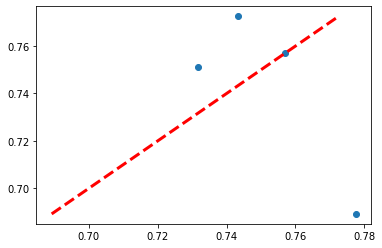

In [2]:
HYPER_max_pad = 15

os.makedirs("./results/stats", exist_ok=True)
categorical_vars = list()
for i in range(HYPER_max_pad):
    categorical_vars.extend(list())

X_train = pd.read_csv(
    f"./results/splits/X_train_padded_translated.csv",
    dtype={k: "category" for k in categorical_vars},
)
y_train = pd.read_csv(f"./results/splits/y_train.csv")
X_test = pd.read_csv(
    f"./results/splits/X_test_padded_translated.csv",
    dtype={k: "category" for k in categorical_vars},
)
y_test = pd.read_csv(f"./results/splits/y_test.csv")

# drop useless columns (both X_train and X_test have the same columns)
cols_to_drop = list()
for col in X_train.columns:
    if "Batch" in col:  # remove all "Batch_N"
        cols_to_drop.append(col)

X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)
model = linear_model.LinearRegression(n_jobs=-1)
model.fit(X_train, y_train.values.ravel())

y_predicted = model.predict(X_test)

print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_predicted)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_predicted)}")
print(f"R-Squared: {metrics.r2_score(y_test, y_predicted)}")
plt.scatter(y_predicted, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=3)
